### 1.	Perform K means clustering on the airlines dataset to obtain optimum number of clusters. Draw the inferences from the clusters obtained. Refer to EastWestAirlines.xlsx dataset.

In [38]:
#import necessary packages
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [2]:
df=pd.read_excel("C:\\Users\\tarun\\Documents\\taruns imp\\Data science material\\assignments\\SETS\\kmeans clustering\\EastWestAirlines (1).xlsx",sheet_name='data')

In [3]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
#drops id column  
df_1=df.drop(["ID#"],axis=1)

In [5]:
#Normalization funtion 
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [6]:
df_1=norm_func(df.iloc[:,0:])

In [7]:
#screen plot or elblow plot 
TWSS=[]
k_1=list(range(2,12))
for i in k_1:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df)
    TWSS.append(kmeans.inertia_)

Text(0, 0.5, 'total_within_SS')

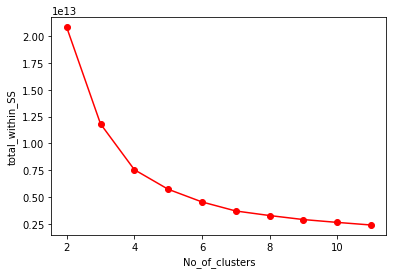

In [8]:
#visualisilng screen plot
plt.plot(k_1,TWSS,'ro-');plt.xlabel("No_of_clusters");plt.ylabel("total_within_SS")

In [9]:
#selecting clusters 
model=KMeans(n_clusters=3)
model.fit(df_1)

KMeans(n_clusters=3)

In [10]:
model.labels_
mb=pd.Series(model.labels_)
df_1['clust']=mb

In [11]:
df_1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,2
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,2
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,2
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,2
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,1
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,1
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,1
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0


In [12]:
df_2=df_1.iloc[:,[11,0,1,2,3,4,5,6,7,8,9,10]]

In [18]:
df_2.iloc[:,0:].groupby(df_1.clust).mean()

,Award?,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
clust,,,,,,,,,,,,
0,0.0,0.781516,0.024848,0.008789,0.107446,0.007716,0.001543,0.026937,0.092305,0.007276,0.011749,0.255612
1,1.0,0.433978,0.056928,0.021546,0.415429,0.007765,0.004558,0.109621,0.183518,0.027826,0.049049,0.557398
2,0.0,0.284561,0.045934,0.006871,0.249386,0.006137,0.002864,0.051356,0.121170,0.007415,0.012908,0.677613


### 2.	Perform clustering for the crime data and identify the number of clusters            formed and draw inferences. Refer to crime_data.csv dataset.

In [3]:
crime_data=pd.read_csv(r"C:\Users\tarun\Documents\taruns imp\Data science material\assignments\SETS\kmeans clustering\crime_data (1).csv")

In [4]:
#EDA
crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [8]:
crime_data=crime_data.drop(["Unnamed: 0"],axis=1)

In [9]:
#preprocessing 
def norm_func(i):
     x=(i-i.min())/(i.max()-i.min())
     return(x)

In [10]:
#NORMALIZATION 
crime_data_1=norm_func(crime_data.iloc[:,0:])

In [19]:
#screen plot or elbow curve 
TWSS=[]
k= list(range(1,10))
 
for i in k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(crime_data_1)
    TWSS.append(kmeans.inertia_)


C:\Users\tarun\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'twss')

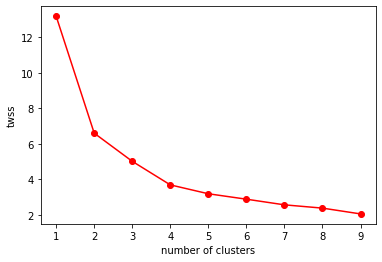

In [21]:
#plot
plt.plot(k,TWSS,'ro-');plt.xlabel("number of clusters");plt.ylabel("twss")

In [24]:
model=KMeans(n_clusters=2)
model.fit(crime_data_1)
model.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [25]:
crime_cluster = pd.Series(model.labels_)

In [27]:
crime_data['clust'] = crime_cluster

In [30]:
final_crimedata = crime_data.iloc[:, [4,0,1,2,3]]

In [31]:
final_crimedata.iloc[:, 0:].groupby(final_crimedata.clust).mean()

,clust,Murder,Assault,UrbanPop,Rape
clust,,,,,
0,0.0,12.165,255.250000,68.400000,29.165000
1,1.0,4.870,114.433333,63.633333,15.943333


### 
3.	Analyze the information given in the following ‘Insurance Policy dataset’ to             create clusters of persons falling in the same type. Refer to Insurance Dataset.csv


In [2]:
insurance_data= pd.read_csv(r"C:\Users\tarun\Documents\taruns imp\Data science material\assignments\SETS\kmeans clustering\Insurance Dataset.csv")

In [4]:

#EDA
insurance_data.describe()

,Premiums Paid,Age,Days to Renew,Claims made,Income
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,12542.250000,46.110000,120.400000,12578.993367,102250.000000
std,6790.731666,13.887641,88.055767,13695.906762,43517.237964
min,2800.000000,23.000000,1.000000,1978.260870,28000.000000
25%,6975.000000,34.000000,56.000000,5220.648735,65125.000000
50%,11825.000000,45.000000,89.000000,8386.043907,102250.000000
75%,15475.000000,54.500000,186.500000,14670.889520,139375.000000
max,29900.000000,82.000000,321.000000,99676.744190,176500.000000


In [5]:
# Normalization function
def norm_func(i):
    x = (i-i.min()) / (i.max()-i.min())
    return(x)

In [7]:
# Normalizing the Data frame
Ins_data = norm_func(insurance_data.iloc[:,0:])


In [9]:
# Scree plot 
TWSS = []
Ins_data_2 = list(range(1,10))

In [10]:
for i in Ins_data_2:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit( Ins_data)
    TWSS.append(kmeans.inertia_)

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'total')

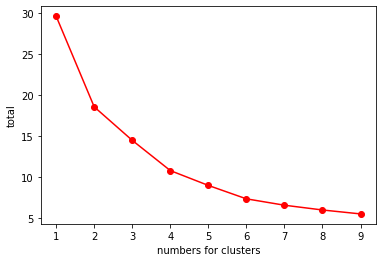

In [12]:
#lets plot
plt.plot(Ins_data_2,TWSS,'ro-');plt.xlabel('numbers for clusters');plt.ylabel('total')

In [13]:
#selecting
model=KMeans(n_clusters=3)
model.fit(Ins_data)

KMeans(n_clusters=3)

In [14]:
model.labels_

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
#covering them in series
inurace_grouping=pd.Series(model.labels_)

In [19]:
Ins_data['clust']=inurace_grouping

In [24]:
final_data = Ins_data.iloc[:, [5,0,1,2,3,4]]

In [25]:
final_data.iloc[:, 0:].groupby(final_data.clust).mean()

,clust,Premiums Paid,Age,Days to Renew,Claims made,Income
clust,,,,,,
0,0.0,0.231550,0.395763,0.751250,0.153363,0.340404
1,1.0,0.223097,0.284331,0.198597,0.035687,0.358071
2,2.0,0.657630,0.558775,0.405040,0.194663,0.827305


### 4.	Perform clustering analysis on the telecom dataset. The data is a mixture of both categorical and numerical data. It consists of the number of customers who 

In [3]:
tele_data=pd.read_excel("C:\\Users\\tarun\\Documents\\taruns imp\\Data science material\\assignments\\SETS\\kmeans clustering\\Telco_customer_churn (1).xlsx")

In [8]:
tele_data

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,Q3,No,0,72,None,Yes,22.77,No,...,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53
7039,6840-RESVB,1,Q3,Yes,1,24,Offer C,Yes,36.05,Yes,...,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47
7040,2234-XADUH,1,Q3,Yes,4,72,None,Yes,29.66,Yes,...,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04
7041,4801-JZAZL,1,Q3,Yes,1,11,None,No,0.00,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21


In [9]:
tele_1_data = tele_data.iloc[:,3:30]

In [10]:
tele_2_data = tele_1_data.copy()

In [11]:
#lable encoding dummy vairable  creation 
objlist=tele_2_data.select_dtypes(include="object").columns
print(objlist)

Index(['Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method'],
      dtype='object')


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for feat in objlist:
    tele_2_data[feat]=le.fit_transform(tele_2_data[feat].astype(str))
    

In [14]:
print(tele_2_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  7043 non-null   int32  
 1   Number of Referrals                7043 non-null   int64  
 2   Tenure in Months                   7043 non-null   int64  
 3   Offer                              7043 non-null   int32  
 4   Phone Service                      7043 non-null   int32  
 5   Avg Monthly Long Distance Charges  7043 non-null   float64
 6   Multiple Lines                     7043 non-null   int32  
 7   Internet Service                   7043 non-null   int32  
 8   Internet Type                      7043 non-null   int32  
 9   Avg Monthly GB Download            7043 non-null   int64  
 10  Online Security                    7043 non-null   int32  
 11  Online Backup                      7043 non-null   int32

In [18]:
#normalization function 
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [19]:
df_nor=norm_func(tele_2_data.iloc[:,0:])

In [21]:
TWSS=[]
k=list(range(1,24))

for i in k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_nor)
    TWSS.append(kmeans.inertia_)

Text(0, 0.5, 'total within sum of squares')

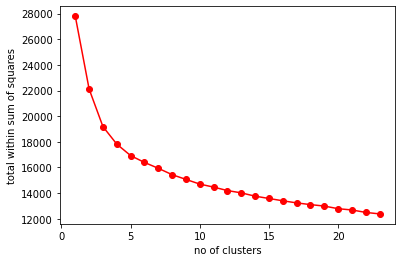

In [23]:
#SCREENPLOT
plt.plot(k,TWSS,'ro-');plt.xlabel("no of clusters");plt.ylabel("total within sum of squares")

In [24]:
model=KMeans(n_clusters=3)
model.fit(df_nor)

KMeans(n_clusters=3)

In [25]:
model.labels_
mb=pd.Series(model.labels_)

In [52]:
tele_2_data['clust']=mb

In [53]:
final_data=final_data.iloc[:,[26,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,]]

In [54]:
#aggregate
tele_2_data.iloc[:,0:].groupby(tele_2_data.clust).mean()

,Total Long Distance Charges,Total Revenue,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,clust
clust,,,,,,,,,,,,,,,,,,,,,
0,1231.644670,5933.414596,0.661879,2.928190,51.710300,0.886336,0.923266,24.094584,0.682807,1.000000,...,0.737792,0.867460,1.167009,0.697579,0.404185,90.646676,4693.886992,2.289409,10.172343,0.0
1,355.525481,1528.944743,0.296031,1.064086,17.937215,1.787899,0.838972,21.050224,0.313273,1.000000,...,0.224463,0.855888,0.265127,0.658751,0.428107,65.914558,1167.806522,1.859610,7.472349,1.0
2,771.215868,1443.488368,0.456266,2.180157,30.641645,1.429504,1.000000,24.982389,0.224543,0.003916,...,0.000000,0.000000,1.081593,0.291123,0.795039,21.272389,673.554432,1.647467,0.365535,2.0


### 5.	Perform clustering on mixed data. Convert the categorical variables to numeric by using dummies or label encoding and perform normalization techniques. The dataset has the details of customers related to their auto insurance. Refer to Autoinsurance.csv dataset.

In [3]:
insu_data=pd.read_csv(r"C:\Users\tarun\Documents\taruns imp\Data science material\assignments\SETS\kmeans clustering\AutoInsurance (1).csv")

In [4]:
insu_data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [5]:
insu_data_2= insu_data.drop(["Customer"], axis = 1)

In [35]:
insu_data_2

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,10/2/2011,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,12/2/2011,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,6/2/2011,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,3/2/2011,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [6]:
data_2=insu_data_2.copy()

In [9]:
#label encoding dummy variables
objlist=data_2.select_dtypes(include="object").columns
print(objlist)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

Index(['State', 'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')


In [10]:
for feat in objlist:
    data_2[feat]=le.fit_transform(data_2[feat].astype(str))

In [11]:
print(data_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   int32  
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   int32  
 3   Coverage                       9134 non-null   int32  
 4   Education                      9134 non-null   int32  
 5   Effective To Date              9134 non-null   int32  
 6   EmploymentStatus               9134 non-null   int32  
 7   Gender                         9134 non-null   int32  
 8   Income                         9134 non-null   int64  
 9   Location Code                  9134 non-null   int32  
 10  Marital Status                 9134 non-null   int32  
 11  Monthly Premium Auto           9134 non-null   int64  
 12  Months Since Last Claim        9134 non-null   i

In [20]:
#normalization finction 
def norm_func(i):
    x = (i - i.min())	/ (i.max() - i.min())
    return (x)

In [21]:
#normalising the data set
df_norm=norm_func(data_2.iloc[:,1:])

In [24]:
#screen plot
TWSS=[]
k=list(range(1,24))

for i in k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)

Text(0, 0.5, 'total number of sum of squares')

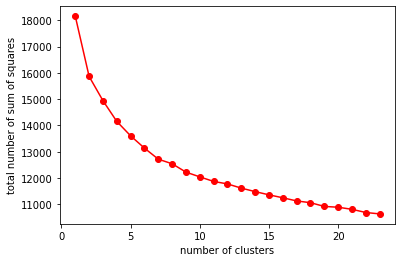

In [28]:
#screen plot
plt.plot(k,TWSS,"ro-");plt.xlabel("number of clusters");plt.ylabel("total number of sum of squares")

In [29]:
model=KMeans(n_clusters=2)
model.fit(df_norm)

KMeans(n_clusters=2)

In [31]:
model.labels_
mb=pd.Series(model.labels_)
data_2["clust"]=mb

In [36]:
final_insu=data_2.iloc[:,[23,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]]

In [43]:
final_insu.head()

,clust,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,0,4,2763.519279,0,0,0,40,1,0,56274,...,5,0,1,0,2,0,0,384.811147,5,1
1,0,0,6979.535903,0,1,0,20,4,0,0,...,42,0,8,1,5,2,0,1131.464935,0,1
2,0,2,12887.431650,0,2,0,34,1,0,48767,...,38,0,2,1,5,0,0,566.472247,5,1
3,1,1,7645.861827,0,0,0,9,4,1,0,...,65,0,7,0,1,0,2,529.881344,3,1
4,1,4,2813.692575,0,0,0,46,1,1,43836,...,44,0,1,1,3,0,0,138.130879,0,1


In [45]:
final_insu.iloc[:,1:].groupby(final_insu.clust).mean()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
clust,,,,,,,,,,,,,,,,,,,,,
0,1.747960,8096.602370,0.141692,0.489910,1.551095,28.737012,1.779519,0.0,38108.176471,0.977243,...,47.949764,0.387076,2.928081,0.826964,3.802705,0.925505,1.124302,412.856483,1.851653,1.089738
1,1.735255,7909.551488,0.144772,0.470956,1.557194,28.453307,1.873771,1.0,37188.253575,0.981010,...,48.184093,0.381591,3.005809,0.824844,3.792672,1.016756,1.080206,456.184439,1.934763,1.089366
